In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os 
import importlib
#globals().update(importlib.import_module('cv2.cv2').__dict__)
import cv2
from random import shuffle
import shutil
import pandas as pd
import tqdm
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
batch_size = 100
ratio =0.25
n=20580

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                    )
val_datagen = ImageDataGenerator(rescale=1/255.)

In [4]:
train_generator = train_datagen.flow_from_directory(
        './data/train/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        './data/validation/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 16474 images belonging to 120 classes.
Found 4106 images belonging to 120 classes.


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))

In [6]:
#epochs = 120
#lrate = 0.01
#decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
from keras import optimizers
opt=optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)        0         
__________

In [8]:
## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
history = LossHistory()

## Callback for early stopping the training
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              #min_delta=0,
                              #patience=2,
                              #verbose=0, mode='auto')

In [9]:
fitted_model = model.fit_generator(
        train_generator,
        epochs=240,
        validation_data=validation_generator,
        callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True), history],
        verbose=0)

HBox(children=(IntProgress(value=0, description='Training', max=120), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 20', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 22', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 23', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 24', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 26', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 28', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 30', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 32', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 34', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 35', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 36', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 38', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 40', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 42', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 44', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 46', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 48', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 50', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 52', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 54', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 55', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 56', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 57', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 58', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 59', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 60', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 61', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 62', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 63', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 64', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 65', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 66', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 67', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 68', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 69', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 70', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 71', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 72', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 73', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 74', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 75', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 76', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 77', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 78', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 79', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 80', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 81', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 82', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 83', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 84', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 85', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 86', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 87', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 88', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 89', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 90', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 91', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 92', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 93', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 94', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 95', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 96', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 97', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 98', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 99', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 100', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 101', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 102', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 103', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 104', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 105', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 106', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 107', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 108', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 109', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 110', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 111', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 112', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 113', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 114', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 115', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 116', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 117', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 118', max=165), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 119', max=165), HTML(value='')))

In [10]:
model.save('./models/model4.h5')

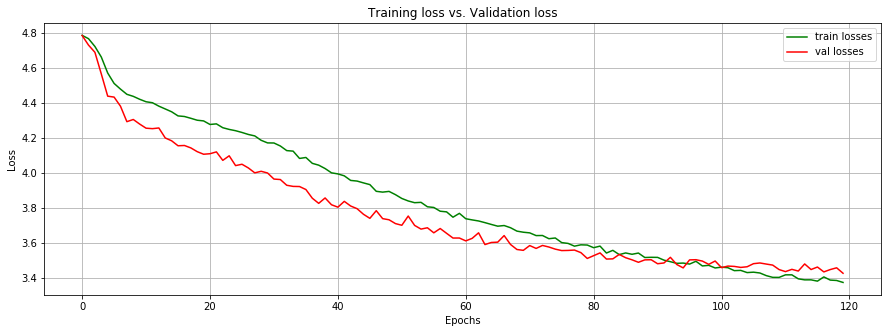

In [11]:
losses, val_losses = history.losses, history.val_losses
fig = plt.figure(figsize=(15, 5))
plt.plot(fitted_model.history['loss'], 'g', label="train losses")
plt.plot(fitted_model.history['val_loss'], 'r', label="val losses")
plt.grid(True)
plt.title('Training loss vs. Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

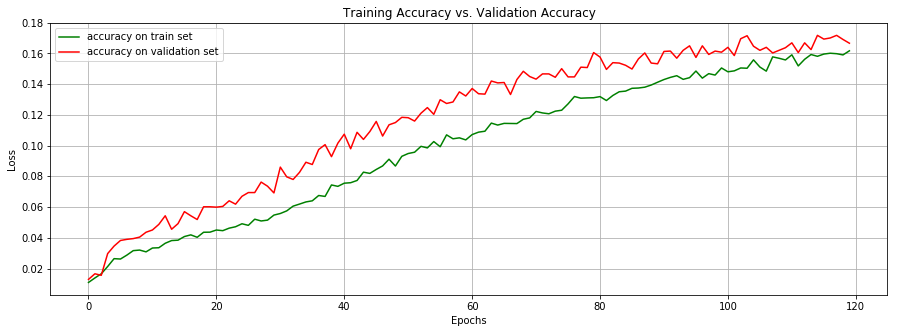

In [12]:
losses, val_losses = history.losses, history.val_losses
fig = plt.figure(figsize=(15, 5))
plt.plot(fitted_model.history['acc'], 'g', label="accuracy on train set")
plt.plot(fitted_model.history['val_acc'], 'r', label="accuracy on validation set")
plt.grid(True)
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()